# Shake Table Data Analysis Tools

This notebook provides some basic code you can run to help your group visualize the shake table data.

A shake table is a device for shaking scaled slopes, structural models or building components with a wide range of simulated ground motions, including reproductions of recorded earthquakes time-histories.

We will use the Loma Prieta Earthquake time-history data set to work through the code in this notebook together.

# <span style="color:dimgray"> Equipping Tools</span>

The Jupyter notebooks we create come equipped with the basic commands and functions of the Python coding language. 

But, we want to be able to do more sophisticated data manipulation and graphing within our notebook, so we will have to upgrade it with *packages*.  These packages will give us more tools to work with when we analyze our data.  It's like we started with a basic four function calculator and need to upgrade it to a graphing calculator.

There are over 100,000 packages for Python listed on PyPI (Python Package Index).  We'll only be using 3:

**NumPY**
A coding package for scientific computing and working with arrays.

**MatPlotLib**
A plotting library for Python and the NumPy extension.

**Pandas**
A package providing fast and flexible data structures, making it easier to work with data.

## <span style="color:dimgray"> To Run a Code Cell</span>

## press <span style="color:firebrick"> 'shift' + 'enter'</span>

***

In [2]:
# CODE CELL 1

# This is a 'Code' Cell.
# This green text is called documentation.  
# Documentation is not code, but is important to coding
# It is text used to describe code, making it easier to understand and use.
# All documentation is preceded by a '#' character.  Python ignores any text in line after a '#'

# You run a code cell in a Jupyter Notbeook by selecting the cell and pressing 'shift' + 'enter'

# Type in the code from your worksheet below:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <span style="color:steelblue"> Importing Data From CSV</span>

## <span style="color:dimgray"> Vocabulary</span>

**Data Frame**
This is a tool to organize data, like a spreadsheet.  
    
Each column is a set of data called a *series*.  A *series* is a one-dimensional array that contains one type of data.
    
The data we will collect will have 5 series (columns) and 1 *index*.  One of our *series* holds strings for the name of the sensor.  The other 4 *series* will hold the time data, and the acceleration data for the x, y, and z directions.  
    
The rows of the data frame are indexed with 0, 1, 2, 3, ... An *index* is a reference we will use to mark one instance of data collection. In the example below, index 0 (or row 0) holds the first instance of data collected by the alpha sensor. Index 1 holds the first instance of data collected by the bravo sensor, etc.
   
|    |ClientId| ms  | x  | y  | z |

| ---|---|---|----|----|----|

|0  | alpha  |  1 | 0.386719 | -0.068359 | 0.960938

|1  | bravo  |  1 | -0.273438| 0.222656| 0.810547

|2  | alpha  |  5 | -0.003906| 0.222656 | 1.115234

|3  | bravo  |  5 | 0.441406 | -0.156250| 1.007812    
  
***
		
        
**CSV File**
CSV stands for comma-separated value.  
    
It is a simple file type that saves tabular data, like from a spreadsheet or database.  The data we collect will be saved in a csv file.


### <span style="color:royalblue"> Coding Key</span>

**`data_frame_name`**

This is what you would like to call the data frame for later use in the code.  Use something descriptive.  Do not start the name with a number, coding languages don't like that.  You can abbreviate, but make sure you will be able to recognize it later.  

***
      
**`file_pathway`** 
  
This is where the csv files is located and how the code will find the data file. 

If the data is from a website, the file_pathway will be the URL.

If the data file is in the same directory (folder) as your Jupyter Notebook, the file_pathway is just the file's name. Don't forget the '.csv' 

Otherwise, you have to find the directory. For example, let's say your Jupyter notebook file is in the <font color='darkorchid'>my data</font> directory on DesignSafe.  The csv file is called <font color='darkorchid'>loma_prieta.csv</font> and is in a folder titled <font color='darkorchid'>shake_table_data</font> and that folder is also in  <font color='darkorchid'>my data</font> directory.  The **`file_pathway`** will be <font color='darkorchid'>shake_table_data/loma_prieta.csv</font>

In [3]:
# CODE CELL 2

# This code cell will read your data file into a pandas data frame.

# Type the code from your worksheet.
# Remember to replace data_frame_name with a new descriptive name.
# Remember to replace file_pathway with the name of your csv file.


lomo_data = pd.read_csv('lomo_prieta.csv')

In [4]:
# CODE CELL 3

# Now let's look at what was imported.
# Replace the blank with the data_frame_name you chose in the cell above

print(lomo_data)

     clientId    ms         x         y         z
0       alpha     1  0.025391  0.029297  0.978516
1       alpha     4  0.017578  0.033203  0.984375
2       alpha     6  0.027344  0.027344  0.988281
3       alpha     9  0.021484  0.033203  0.984375
4       alpha    11  0.025391  0.035156  0.974609
5       alpha    14  0.019531  0.035156  0.976562
6       alpha    16  0.023438  0.037109  0.976562
7       alpha    18  0.019531  0.033203  0.978516
8       alpha    21  0.017578  0.033203  0.978516
9       alpha    24  0.021484  0.042969  0.982422
10      alpha    26  0.025391  0.044922  0.988281
11      alpha    29  0.027344  0.042969  0.984375
12      alpha    31  0.023438  0.041016  0.976562
13      alpha    34  0.017578  0.037109  0.976562
14      alpha    36  0.023438  0.042969  0.982422
15      alpha    38  0.023438  0.041016  0.984375
16      alpha    41  0.021484  0.039062  0.984375
17      alpha    43  0.025391  0.042969  0.980469
18      alpha    46  0.025391  0.042969  0.978516


**What happened?**

** Look over the output and make sure you understand what is going on in the table. **

** What data is being displayed?  How?**

***

# <span style="color:steelblue"> Analyzing Data</span>

We get a lot of data from our experiment and need to figure out what to do to it to make it useful to us.  Looking through the data frame is really not an answer.

So let's start with some basic statistics (like stuff you learned in middle school).

In [5]:
# CODE CELL 4

# This code will perform 1-variable statistics on each series (column of the data frame)
# Replace the blank with data_frame_name you chose earlier

lomo_data.describe()

,ms,x,y,z
count,7404.000000,7404.000000,7404.000000,7404.000000
mean,4915.096569,0.035302,0.036356,0.934981
std,2829.485159,0.534381,0.371109,0.394566
min,1.000000,-2.576172,-2.476562,-2.146484
25%,2488.500000,-0.085938,-0.003906,0.935547
50%,4929.000000,0.031250,0.035156,0.974609
75%,7363.500000,0.126953,0.089844,1.005859
max,9791.000000,3.382812,2.789062,2.580078


**What happened?**

**What does this table tell us about the data?**

**How useful is it?**
***

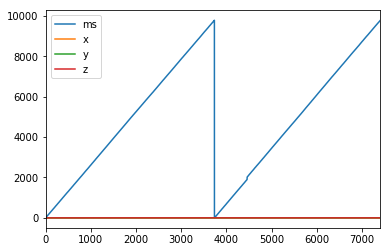

In [6]:
# CODE CELL 5

# This code will create a line graph of the information in the data frame.

lomo_data.plot()
plt.show()

**What happened?**

**What does this graph tell us about the data?**

** How useful is it??**
***
***

## <span style="color:steelblue"> Why We Like Pandas</span>

Pandas make it easy for us to separate out the information we need from a larger data frame.  We'll primarily use a process called *slicing*.  The slicing function uses index values and column labels to separate out portions of a data frame.

However, before we can slice up our data frame into smaller, more useful chunks, we need to separate out the data from the two different sensors. 

We are going to create two new data frames, one for each accelerometer. 

### <span style="color:royalblue"> Coding Key</span>

**`accelerometer1`**

**`accelerometer2`**

These are what you would call the two different accelerometers attached to your structure and peg board.  To make this all easier for everyone, **`accelerometer1`** is the one attached to the peg board, **`accelerometer2`** is the one attached to the structure.

***

**`data_frame_name_accelerometer1`**

**`data_frame_name_accelerometer2`**

These are what you would like to call the two new data frames you will be creating. For example, if you are looking at the Kobe earthquake simulation data and your team used the alpha and bravo accelerometers you can use  <font color='darkorchid'>kobe_alpha</font> and  <font color='darkorchid'>kobe_bravo</font>.  

You can use abbreviations to make these names shorter, but make sure you can tell them apart later. 

In [7]:
# CODE CELL 6

# This block of code will separate out the information in the original data frame by values in 'ClientId',
# which holds the name of the accelerometer. Then the code assigns that section of data to a new data frame.

# Remember to continue using the same variable name for 'data_frame_name'

alpha = "alpha"
lomo_data_alpha = lomo_data[lomo_data.clientId == alpha]



In [8]:
# CODE CELL 7

# In this cell, print out the new data frame to make sure the code worked.

print(lomo_data_alpha)

     clientId    ms         x         y         z
0       alpha     1  0.025391  0.029297  0.978516
1       alpha     4  0.017578  0.033203  0.984375
2       alpha     6  0.027344  0.027344  0.988281
3       alpha     9  0.021484  0.033203  0.984375
4       alpha    11  0.025391  0.035156  0.974609
5       alpha    14  0.019531  0.035156  0.976562
6       alpha    16  0.023438  0.037109  0.976562
7       alpha    18  0.019531  0.033203  0.978516
8       alpha    21  0.017578  0.033203  0.978516
9       alpha    24  0.021484  0.042969  0.982422
10      alpha    26  0.025391  0.044922  0.988281
11      alpha    29  0.027344  0.042969  0.984375
12      alpha    31  0.023438  0.041016  0.976562
13      alpha    34  0.017578  0.037109  0.976562
14      alpha    36  0.023438  0.042969  0.982422
15      alpha    38  0.023438  0.041016  0.984375
16      alpha    41  0.021484  0.039062  0.984375
17      alpha    43  0.025391  0.042969  0.980469
18      alpha    46  0.025391  0.042969  0.978516


In [9]:
# CODE CELL 8

# In this cell, create a new data frame for accelerometer2.
# What process can you do here to be replicate the previous typed code?
# Print the data frame out for the second accelerometer to make sure it all worked.


bravo = "bravo"

lomo_data_bravo = lomo_data[lomo_data.clientId == bravo]

print(lomo_data_bravo)



     clientId    ms         x         y         z
3734    bravo     2  0.039062  0.033203  0.976562
3735    bravo     4  0.039062  0.037109  0.974609
3736    bravo     7  0.046875  0.031250  0.968750
3737    bravo     9  0.041016  0.037109  0.955078
3738    bravo    12  0.042969  0.039062  0.949219
3739    bravo    14  0.033203  0.039062  0.958984
3740    bravo    17  0.041016  0.031250  0.978516
3741    bravo    19  0.037109  0.033203  0.978516
3742    bravo    22  0.052734  0.029297  0.972656
3743    bravo    24  0.041016  0.033203  0.978516
3744    bravo    27  0.052734  0.037109  0.970703
3745    bravo    29  0.050781  0.029297  0.970703
3746    bravo    32  0.048828  0.039062  0.972656
3747    bravo    34  0.039062  0.044922  0.978516
3748    bravo    37  0.039062  0.044922  0.974609
3749    bravo    39  0.041016  0.050781  0.958984
3750    bravo    42  0.042969  0.048828  0.960938
3751    bravo    44  0.035156  0.046875  0.972656
3752    bravo    46  0.037109  0.037109  0.966797


***
### <span style="color:steelblue">Indices</span>

You may have noticed that the indices of the data frame for the second accelerometer does not start at zero, but were the same values as they were for the original data frame.  

We need to fix that by resetting the index.  The line of code below will reset the index so it starts at zero.
***

In [10]:
# CODE CELL 9

# In this cell, type in the line of code that will reset the index to zero.

lomo_data_bravo = lomo_data_bravo.reset_index(drop=True)

In [11]:
# CODE CELL 10

# In this cell, print out the new data frame to make sure the code worked and the index was reset.

print(lomo_data_bravo)

     clientId    ms         x         y         z
0       bravo     2  0.039062  0.033203  0.976562
1       bravo     4  0.039062  0.037109  0.974609
2       bravo     7  0.046875  0.031250  0.968750
3       bravo     9  0.041016  0.037109  0.955078
4       bravo    12  0.042969  0.039062  0.949219
5       bravo    14  0.033203  0.039062  0.958984
6       bravo    17  0.041016  0.031250  0.978516
7       bravo    19  0.037109  0.033203  0.978516
8       bravo    22  0.052734  0.029297  0.972656
9       bravo    24  0.041016  0.033203  0.978516
10      bravo    27  0.052734  0.037109  0.970703
11      bravo    29  0.050781  0.029297  0.970703
12      bravo    32  0.048828  0.039062  0.972656
13      bravo    34  0.039062  0.044922  0.978516
14      bravo    37  0.039062  0.044922  0.974609
15      bravo    39  0.041016  0.050781  0.958984
16      bravo    42  0.042969  0.048828  0.960938
17      bravo    44  0.035156  0.046875  0.972656
18      bravo    46  0.037109  0.037109  0.966797


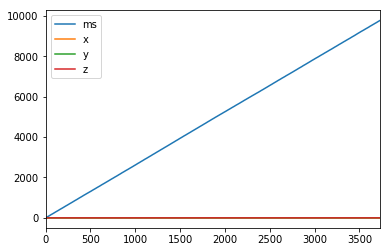

In [12]:
#CODE CELL 11

# In this cell, we will plot the data frame for accelerometer1
# Remember to use the name of the new data frame for accelerometer1

lomo_data_alpha.plot()
plt.show()



**What happened?**

**What is this a graph of?**

** How useful is it?**

**How can we make it more useful?**

***


# <span style="color:chocolate">Graphing</span>

We can't tell what portion of the data set is useful to us yet.  The graphs that the basic **`plot.()`** function gives are not helping because the x-axis shows the index values and we really want to see the x-axis be for the time.

So we are going to alter the **`plot.()`** function to give us more useful data

***

*Note:  The word "graph" we use in K-12 math classes is not the same as what mathematicians and scientists think of when they hear the word "graph." What we call "graphs" are what they call "plots."  "Graphs" refer to graph theory graphs.  Google them if you are curious.*
***

## <span style="color:chocolate">Choosing Axes</span>

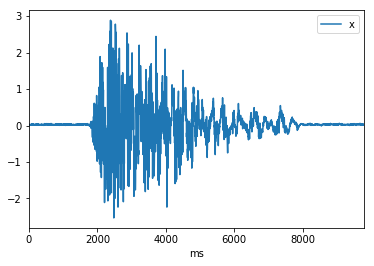

In [13]:
# CODE CELL 12

# In this block of code we will assign a specific series (column)
# to be the x-values and another to be the y-values.
# We will graph data from the data frame for the first accelerometer

lomo_data_alpha.plot(x='ms', y='x')
plt.show()



**The code inside the (  ) are called parameters.**

**How did adding these parameters change the graph?**

**What is this a graph of?**

**How can I graph the other series vs. time?**
***

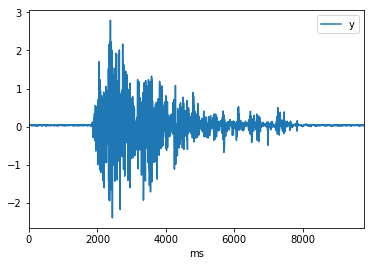

In [14]:
# CODE CELL 13
# In this cell, graph the y data from the first accelerometer.
# Copy and paste the code from the cell above and alter it to graph the correct data

lomo_data_alpha.plot(x='ms', y='y')
plt.show()

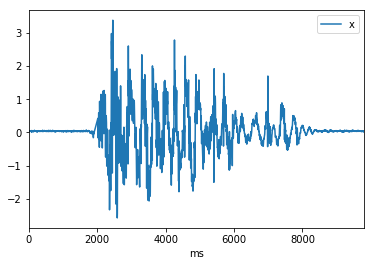

In [15]:
# CODE CELL 14

# In this cell, graph the x data for the second accelerometer.
# Copy and paste the code from the cell above and alter it to graph the correct data

lomo_data_bravo.plot(x='ms', y='x')
plt.show()

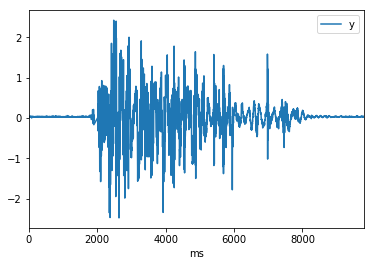

In [16]:
# CODE CELL 15

# In this cell, graph the y data for the second accelerometer.
# Copy and paste the code from the cell above and alter it to graph the correct data

lomo_data_bravo.plot(x='ms', y='y')
plt.show()

## <span style="color:chocolate">Graphing More Than One Data Set</span>

One of the things that we probably want to do is compare/contrast different data sets.  The easiest way to do this is to graph them together. 

We have two ways we can do this.

We can plot them together in the same set of axes or we can create two graphs and display them.  We'll try both and you group can decide which method you can get more information from. 

### <span style="color:chocolate">Plotting on the Same Axes</span>

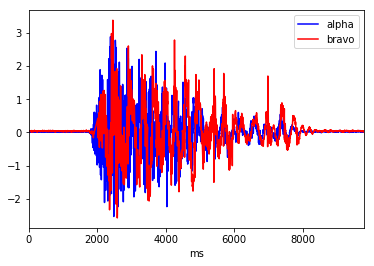

In [17]:
# CODE CELL 16

# This block of code will allow you to graph two different data sets, scaled on the same set of axes.
# We want to plot the x-data for both accelerometers together so we can see what is happening.

# Remember to continue to use the variable names you chose earlier.

ax = lomo_data_alpha.plot(x='ms', y='x', color='blue', label='alpha')

lomo_data_bravo.plot(x='ms', y='x', color='red', label='bravo', ax=ax)

plt.show()



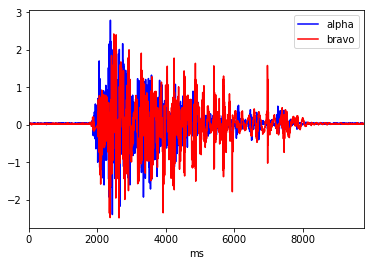

In [19]:
# CODE CELL 17

# In this cell, plot the y-data from both accelerometers

ax = lomo_data_alpha.plot(x='ms', y='y', color='blue', label='alpha')

lomo_data_bravo.plot(x='ms', y='y', color='red', label='bravo', ax=ax)

plt.show()




### <span style="color:chocolate">Plotting Stacked Graphs</span>

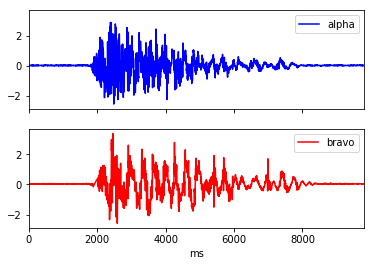

In [20]:
# CODE CELL 18

# This block of code will create two graphs and stack them.  
# Both graphs will have the same scales on both x and y axes.
# We will graph the x data from both of the accelerometers.

fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', sharey='col')
ax = lomo_data_alpha.plot(x = 'ms', y = 'x', color='blue', ax=axes[0], label = 'alpha')
bx = lomo_data_bravo.plot(x = 'ms', y = 'x', color='red', ax=axes[1], label = 'bravo')
plt.show()



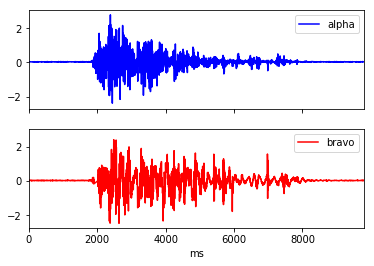

In [21]:
# CODE CELL 19

# In this cell, plot the y-data for both accelerometers so they are separate and stacked
# Fill in the blanks to create this code

fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', sharey='col')
ax = lomo_data_alpha.plot(x = 'ms', y = 'y', color='blue', ax=axes[0], label = 'alpha')
bx = lomo_data_bravo.plot(x = 'ms', y = 'y', color='red', ax=axes[1], label = 'bravo')
plt.show()



## <span style="color:steelblue">Saving Graphs as .png Files</span>

If you were do a presentation, you might want to show some of the graphs you created.  You can easily do so by replacing a single line of your code, the **`plt.show()`** with **`plt.savefig()`**

Using this function will save the plot you create as a .png file.  The new file will be located in the same directory the Jupyter Notebook file is located, unless you specify a different directory.


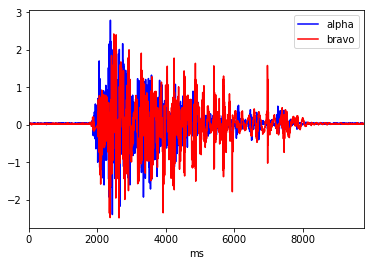

In [26]:
# CODE CELL 20

# This block will save a graph as a png file.

# Copy and paste the lines of code for one of the graphs you created earlier directly below this line of documentation.

ax = lomo_data_alpha.plot(x='ms', y='y', color='blue', label='alpha')

lomo_data_bravo.plot(x='ms', y='y', color='red', label='bravo', ax=ax)


# Type code to create a png file below:

plt.savefig('stacked_plot_1.png')

## <span style="color:chocolate">Changing the Window</span>

There are times that you will want to zoom in or zoom out of your graph.  We can do this easily with a couple of lines of additional code.



In [ ]:
# copy and paste the code from one of your graphs directly below this line of documentation.
# Do not include the line plt.show() in this space.  It needs to be at the end of the block of code.








# Fill in the blanks as follows:
# plt.ylim (min, max)
# plt.xlim (min, max)

plt.ylim (__, __)
plt.xlim (__, __)

plt.show()

## <span style="color:steelblue">Slicing a Data Frame</span>

Slicing a data frame is like zooming in on a specific portion of the table.  It is a little different in that we slice using the index values and column labels as reference.

We are going to practice slicing a data frame in case you find that you need to focus in on a small portion of the data collected during your analysis. 

### <span style="color:royalblue">Coding Key</span>

**`df_slice`**

This is what you would like to call the new data frame that will hold the slice of the larger data frame


In [ ]:
# Below is some code you can use to slice a panda data frame.  
# This code will allow you to specify both index values and columns by labels

# Replace the blanks as follows
# df_slice = data_frame_name_accelerometer1.loc [ min:max, ['column1 label']]

______ = _____.loc[___:___, ['___']]

# Print and plot this new data frame to see what you get
# Replace the blanks as follows:

#print df_slice

print ______

# df_slice.plot()

_____.plot()

plt.show()


# <span style="color:blueviolet">Graphing Extras</span>

Here are some optional extra lines of code that you can use/add to put some more detail into your graphs and control the appearance of the plots.  The sample code given shows the same base code with the extras added in one at a time.  By the end the code is pretty long.  

## <span style="color:mediumorchid">Changing Line Width</span>

To change the line width of one of your graphs, you need to add a parameter within the paretheses of the `.plot()` function. Note that each of the parameters is separated by a comma.  Don't forget the comma.

**`linewidth = float`**

**`float`** is a decimal value between 0 and well, whatever you want, but it starts to get pretty useless after about 10.

The sample code below shows how to use this parameter.

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', linewidth = 4)
plt.show()
```

Copy and paste the code from one of your graphs above into a new code cell and change the line width.  Experiment with the number to see the differences in widths produced.

## <span style="color:mediumorchid">Changing Line Color</span>

To change the line color, you need to add a parameter within the parenthese of the **`.plot()`** function.  Don't forget the comma between parameters.

**`color = 'name_of_color'`**

The sample code below shows how to use this parameter.

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', linewidth = 4, color = 'green')
plt.show()
```

Notice the the name of the color needs to be in quotes.  

Copy and paste the code from one of your graphs above into a new code cell and change the color of the line.

For a list of colors available go to https://matplotlib.org/examples/color/named_colors.html


## <span style="color:mediumorchid">Adding Labels to Your Axes</span>

If you would like to label the axes of your graph, include the following lines of code

```python
plt.xlabel ('String you want to use as a label')
plt.ylabel ('String you want to use as a label')
```

This code will go inbetween the **`.plot()`** function and the `plt.show()`

The sample code below would add the labels "This is the x-axis" and "This is the y-axis" to a graph.

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', linewidth = 4, color = 'green')

# the additional code the add labels to the axes
plt.xlabel ('This is the x-axis')
plt.ylabel ('This is the y-axis')

plt.show()
```

Copy and paste the code from one of your graphs above into a new code cell and add some labels to your axes.  It would be good to label your axes with what variable is graphed there and the units.

## <span style="color:mediumorchid">Adding a Title to Your Graph</span>

If you would like to add a title to your graph, which is good when you have several graphs, include the following line of code.

```python
plt.title ('Title You Want to Give Your Graph')
```
This code will go anywhere inbetween the `.plot()` funciton and the `plt.show()`

The sample code below would add the title "This is a title" to a graph.

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', linewidth = 4, color = 'green')
plt.xlabel ('This is the x-axis')
plt.ylabel ('This is the y-axis')

# the additional line of code to add a title
plt.title ('This is a title')

plt.show()
```

Copy and paste the code from one of your graphs above into a new code cell and add a title to your graph.

## <span style="color:mediumorchid">Manually Choosing the Window</span>

If you do not like the windows the `.plot()` function gave you, you can manually input the min/max values for the x- and y-axes by including the following code.

```python
plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
```

**`min_x`** is the lowest value you want to appear on the x-axis.

**`max_x`** is the highest value you want to appear on the x-axis.

**`min_y`** is the lowest value you want to appear on the y-axis.

**`max_y`** is the highest value you want to appear on the y-axis.

This code will go anywhere inbetween the **`.plot()`** function and the **`plt.show()`**

The sample code below will manually change the x-axis to go from 0 to 10 and the y-axis to go from 0 to 100

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis')
plt.ylabel ('This is the y-axis')
plt.title ('This is a title')

# The two additional lines of code to manually change the window
plt.xlim(0,10)
plt.ylim(0,100)

plt.show()
```

Copy and past the code from one of your graphs above into a new code cell and manipulate the window manually.

## <span style="color:mediumorchid">Manually Setting the Tick Values</span>

If you do not like the location of the tick marks along an axis, you can manually change those as well.  You will need to include the following lines of code:

    plt.xticks(np.arange(min_x, max_x + 1, scale ))
    plt.yticks(np.arange(min_y, max_y + 1, scale ))

**`min_x`** and **`min_y`** are the lowest values you want on the x and y axes.

**`max_x`** and **`max_y`** are the highest values you want on the x and y axes.  **BUT** you have to add 1 to that value or that highest value will not appear as a tick mark.

**`scale`** is the interval you want for your tick marks.  It can be any floating value.  For example, if you want the tick values to show up every 0.5 units on your x-axis, you'd set that scale value to be 0.5

This code will go anywhere inbetween the **`.plot()`** function and the **`plt.show()`**

The sample code below will manually change the x-axis to go from 0 to 10, counting by 2's and the y-axis to go from 0 to 100 counting by 20's.

```python
loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis')
plt.ylabel ('This is the y-axis')
plt.title ('This is a title')
plt.xlim(0,10)
plt.ylim(0,100)

# The two additional lines of code to set the tick mark values
plt.xticks(np.arange(0, 11, 2 ))
plt.yticks(np.arange(0, 101, 20 ))

plt.show()
```

Copy and past the code from one of your graphs above into a new code cell and manipulate the tick marks manually.
    

## <span style="color:mediumorchid">Changing Text Color on a Graph</span>

Changing the color of the text is done the same way you'd change the color of the lines in a graph.  Inside the parenthes of any line of code that produces text, add the following parameter

**`color = 'name_of_color'`**

The sample code below shows how to use this parameter

```python
# The additional bits of code to assign color were added into the ( )

loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis', color = 'red')
plt.ylabel ('This is the y-axis', color = 'red')
plt.title ('This is a title', color = 'blue')
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0, 11, 2 ))
plt.yticks(np.arange(0, 101, 20 ))
plt.show()
```
Notice the the name of the color needs to be in quotes.  

For a list of colors available go to https://matplotlib.org/examples/color/named_colors.html


## <span style="color:mediumorchid">Changing the Background Color</span>

If you would like to change the background color of your graphs from the default "white" to something else, you have to change the **`.plot()`** function parameters. You do this by inserting the following line of code **before** the **`.plot()`** function.

```python
plt.rcParams['axes.facecolor'] = 'color_name'
```

**Note** This line of code will change all subsequent graphs... meaning every graph after this line of code is run will have the background color you specified. If you want to change it back to white, you need to run this line of code again.

The sample of code below shows where to put this particular line to change the background color of your plot to blue.

```python
# The first line of code sets the background color
plt.rcParams['axes.facecolor'] = 'blue'

loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis', color = 'red')
plt.ylabel ('This is the y-axis', color = 'red')
plt.title ('This is a title', color = 'blue')
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0, 11, 2 ))
plt.yticks(np.arange(0, 101, 20 ))
plt.show()
```

## <span style="color:mediumorchid">Changing the Edge Color and Width</span>

The "edge" is the rectangle drawn around your graph, where your scales are located.  If you would like to change the color of the lines outlining your graph from the default "black" to something else, you have to change the **`.plot()`** function parameters.  You do this by inserting the following line of code **before** the **`.plot()`** function.

```python
plt.rc('axes',edgecolor='color_name', linewidth = float)
```
**`float`** is a decimal value between 0 and whatever you want.  It will specify the width of the edge line. 

**Note:** This line of code will change all subsequent graphs, meaning every graph after this line of code is run will have the same edge color and thickness.  

The sample code below shows where to put this particular line to change the edge color to green and the thickness to 2.0.

```python

# This top line of code sets the edge color and edge width
plt.rc('axes',edgecolor='green', linewidth = 2.0)

plt.rcParams['axes.facecolor'] = 'blue'

loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis', color = 'red')
plt.ylabel ('This is the y-axis', color = 'red')
plt.title ('This is a title', color = 'blue')
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0, 11, 2 ))
plt.yticks(np.arange(0, 101, 20 ))
plt.show()
```

## <span style="color:mediumorchid">Changing the Graph Output Size</span>

If you would like to change the size of the output graph, you have to change the **`.plot()`** function parameters.
You do this by inserting the following line of code before the **`.plot()`** function.

The only thing you need to change in the code below is **`new_width`** and **`new_height`**, which will be float values.  These numbers are in "inches."

```python
fig_size = plt.rcParams['figure.figsize']
fig_size[0]=new_width
fig_size[1]=new_height
plt.rcParams['figure.figsize']=fig_size
```

**Note:** This line of code will change all subsequent graphs, meaning every graph after this line of code is run will have the same size.  If you want to change it back to the default, use 6.0 for the width and 4.0 for the height.

The sample code below shows where to put this particular line to change the size of the graph to have a width of 9inches and a height of 7 inches

```python

# These 4 lines of code are what you need to add to change the dimensions of the output graph
fig_size = plt.rcParams['figure.figsize']
fig_size[0]=9
fig_size[1]=7
plt.rcParams['figure.figsize']=fig_size

plt.rc('axes',edgecolor='green', linewidth = 2.0)
plt.rcParams['axes.facecolor'] = 'blue'


loma_prieta_alpha.plot(x = 'ms', y = 'x', color = 'green')
plt.xlabel ('This is the x-axis', color = 'red')
plt.ylabel ('This is the y-axis', color = 'red')
plt.title ('This is a title', color = 'blue')
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0, 11, 2 ))
plt.yticks(np.arange(0, 101, 20 ))
plt.show()
```

## <span style="color:mediumorchid">Annotating with an Arrow</span>

This would be considered "extra fancy", but if you wanted to add a note about a specific part of your graph, like point out the maximum value, you can with the **`plt.annotate()`** function.

```python
plt.annotate('text you want', xy=(____), xytext=(____), arrowprops=dict(facecolor='black', shrink=0.05))
```

Inside **`xy = (_____)`** you place the ordered pair you want the arrow to point to
Inside **`xytext = (_____)`** you place the ordered pair you want your text to start.

This text would go anywhere in between the **`.plot()`** function and the **`plt.show()`**.

You can change the color of the text by adding that parameter within the parentheses.  If you want to change the color of the arrow, change 'black' to whatever color you want.